# Sprint 2

Team ID - PNT2022TMID27424

# Importing the required libraries

In [43]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [44]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [45]:
#create model
model=Sequential ()

In [46]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [47]:
#flatten the dimension of the image
model.add(Flatten())

In [48]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [49]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [50]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [51]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 120s 63ms/step - loss: 0.2808 - accuracy: 0.9487 - val_loss: 0.1263 - val_accuracy: 0.9649
Epoch 2/5
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0734 - accuracy: 0.9780 - val_loss: 0.0947 - val_accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.1133 - val_accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.1308 - val_accuracy: 0.9720
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.1233 - val_accuracy: 0.9781


# Observing the metrics

In [52]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.12333168834447861, 0.9781000018119812]


In [53]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 93ms/step
[[1.1050688e-15 9.2188809e-14 5.0320639e-15 5.0875104e-10 2.6267043e-01
  1.0428948e-08 5.2634429e-17 2.9271017e-09 6.4425700e-07 7.3732901e-01]]


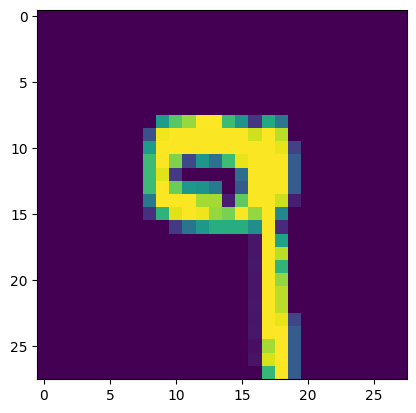

In [54]:
plt.imshow(x_test[6000])

In [55]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [56]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [57]:
# Save the model
model.save('models/mnistCNN.h5')